In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Simulated Credit Score Dataset


In [2]:
data = {
    'Age': [25, 40, 50, 35, 23, 52, 46, 28, 55, 30],
    'Income': [50000, 80000, 120000, 60000, 40000, 150000, 100000, 52000, 130000, 58000],
    'LoanAmount': [20000, 30000, 40000, 15000, 10000, 50000, 25000, 12000, 45000, 17000],
    'LoanDuration': [12, 24, 36, 10, 8, 48, 20, 6, 40, 9],
    'CreditHistory': [1, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    'Purpose': ['car', 'education', 'business', 'car', 'furniture', 'business', 'education', 'car', 'business', 'furniture'],
    'CreditRisk': ['good', 'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad']
}


In [3]:
df = pd.DataFrame(data)

In [4]:
print("Initial Data:")
print(df.head())


Initial Data:
   Age  Income  LoanAmount  LoanDuration  CreditHistory    Purpose CreditRisk
0   25   50000       20000            12              1        car       good
1   40   80000       30000            24              1  education       good
2   50  120000       40000            36              0   business        bad
3   35   60000       15000            10              1        car       good
4   23   40000       10000             8              0  furniture        bad


In [5]:
# Encode categorical columns
label_encoder = LabelEncoder()
df['Purpose'] = label_encoder.fit_transform(df['Purpose'])
df['CreditRisk'] = label_encoder.fit_transform(df['CreditRisk'])  # Target: good=1, bad=0


In [6]:
# Features and target
X = df.drop('CreditRisk', axis=1)
y = df['CreditRisk']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [9]:
# Model - Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Predict and Evaluate
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

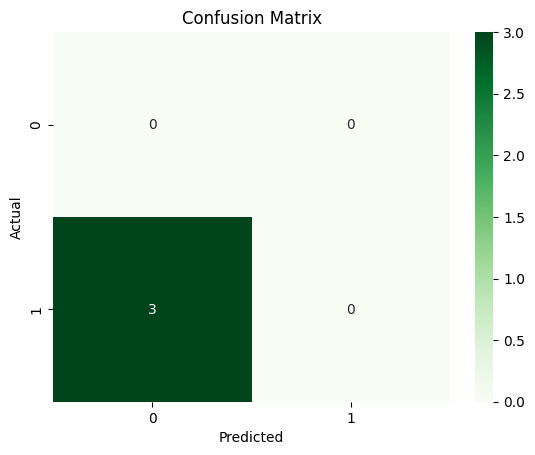

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()